In [170]:
import pandas as pd
import seaborn as sns
df =  pd.read_csv("Multiple.csv")
df["EducationLevel"] = df["EducationLevel"].map({"高中以下":0,"大學":1,"碩士以上":2})

In [171]:
# one hot encoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

Encoder = OneHotEncoder()
encoder = Encoder.fit(df[["City"]])
encoder = encoder.transform(df[["City"]])
encoder = encoder.toarray()
df[["CityA","CityB","CityC"]] = encoder
df = df.drop(["City","CityC"],axis=1)

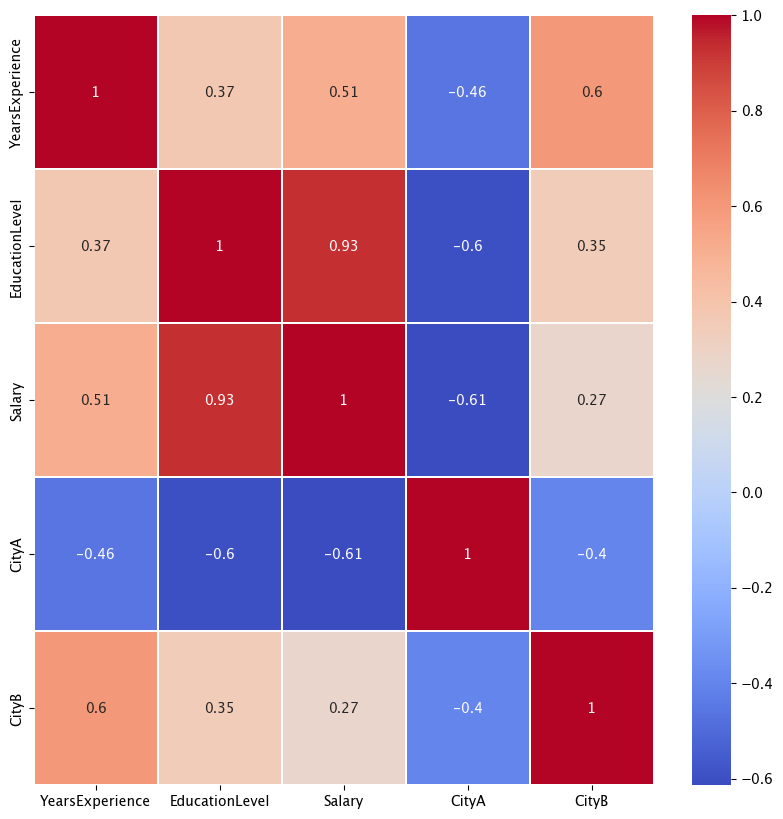

In [172]:
import matplotlib.pyplot as plt
df = df[:]
test = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(test,
            annot=True,
            cmap="coolwarm",
            linewidths=0.2)
plt.show()

In [173]:
from sklearn.model_selection import train_test_split
x = df[["YearsExperience","EducationLevel","CityA","CityB"]]
y = df["Salary"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
len(x_train),len(x_test)

(18, 18)

In [174]:
# pred = w*x_train.sum(axis=1)+b

def compute_cost(y,w,x,b)->list:
    y_pred = (w*x).sum(axis=1)+b
    cost = ((y-y_pred)**2).mean()
    return cost

In [175]:
w = np.array([1,2,3,4])
b = 0
compute_cost(y_train,w,x_train,b)

np.float64(1750.168888888889)

In [176]:
def compute_gradient(y,w,x,b)->list:
    y_pred = (w*x).sum(axis=1)+b
    w_gradient = np.zeros(x.shape[1])
    b_gradient = (y_pred-y).mean()
    
    for i in range(x.shape[1]):
        w_gradient[i] = (x[:,i]*(y_pred-y)).mean()
    return w_gradient,b_gradient

In [177]:
def gradient_descent(w_init,b_init,learning_rate,rite = 10000):
    w = w_init
    b = b_init
    

    w_hist = [ ]
    b_hist = [ ]
    c_hist = [ ]

    for i in range(rite):
        w_gradient,b_gradient = compute_gradient(y_train,w,x_train,b)

        w = w-w_gradient*learning_rate
        b = b-b_gradient*learning_rate

        cost = compute_cost(y_train,w,x_train,b)

        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)

        if (i%1000 == 0):
            print(f"Interation {i:5} Cost {cost:.2e}")
    return w,b,w_init,b_init,c_hist

In [178]:
w_init = np.array([1,2,3,4])
b_init = 0
learning_rate = 0.001
w_final,b_final,w_hist,b_hist,c_hist = gradient_descent(w_init,b_init,learning_rate,rite=25000)

Interation     0 Cost 1.61e+03
Interation  1000 Cost 1.40e+02
Interation  2000 Cost 8.27e+01
Interation  3000 Cost 5.46e+01
Interation  4000 Cost 4.01e+01
Interation  5000 Cost 3.24e+01
Interation  6000 Cost 2.79e+01
Interation  7000 Cost 2.50e+01
Interation  8000 Cost 2.31e+01
Interation  9000 Cost 2.18e+01
Interation 10000 Cost 2.07e+01
Interation 11000 Cost 1.99e+01
Interation 12000 Cost 1.92e+01
Interation 13000 Cost 1.87e+01
Interation 14000 Cost 1.83e+01
Interation 15000 Cost 1.79e+01
Interation 16000 Cost 1.76e+01
Interation 17000 Cost 1.73e+01
Interation 18000 Cost 1.71e+01
Interation 19000 Cost 1.70e+01
Interation 20000 Cost 1.68e+01
Interation 21000 Cost 1.67e+01
Interation 22000 Cost 1.66e+01
Interation 23000 Cost 1.65e+01
Interation 24000 Cost 1.64e+01


In [179]:
y_pred = (w_final*x_train).sum(axis=1)+b_final


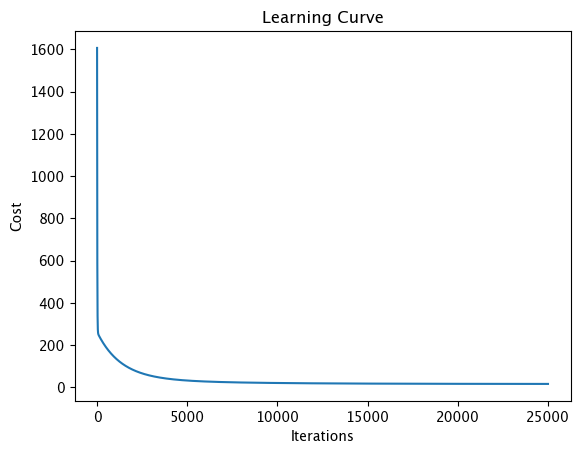

In [180]:
plt.plot(c_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.show()


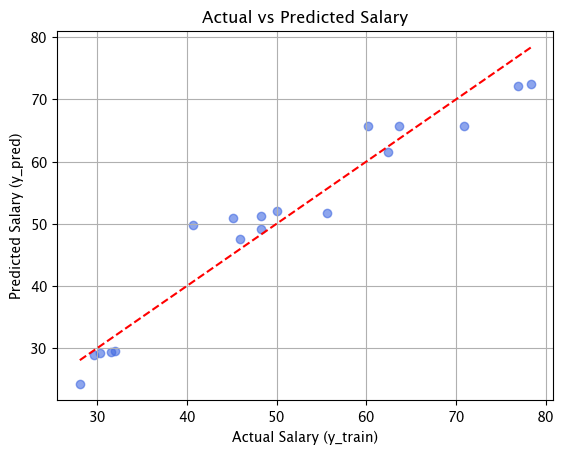

In [181]:
# Plot actual vs predicted values
plt.scatter(y_train, y_pred, color='royalblue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Salary (y_train)')
plt.ylabel('Predicted Salary (y_pred)')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()


In [ ]:
y_pred = (w_final*x_test).sum(axis=1)+b_final
print(y_pred)

[48.50792272 76.0663144  60.9809868  24.5264086  61.87520619 24.16872084
 72.78468276 76.78168992 50.47520538 49.93867374 75.35093889 48.6867666
 75.70862665 50.83289314 71.71161949 65.70923126 62.05405007 23.81103309]
